In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telecom_customer_real.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Perfroming Descriptive Satestics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Mean Tenure  is around 33 months.
# 75% customers has tenure less than 55 months.
# Avarge monthly charges are 64.76 USD whereas 25% customers pay more than USD 89.85 per month. 

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

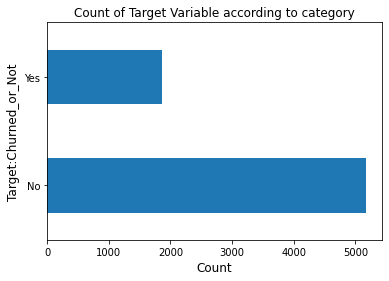

In [10]:
df['Churn'].value_counts().plot(kind='barh')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Target:Churned_or_Not',fontsize=12)
plt.title('Count of Target Variable according to category',fontsize=12)
plt.show()

# Churn Percentage

In [11]:
Churned = (df['Churn'].value_counts()[1]/(df['Churn'].value_counts()[0]+df['Churn'].value_counts()[1]))*100
Churned

26.536987079369588

In [12]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [13]:
# summery of dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Finding the missing Values

In [14]:
df.shape[0]

7043

In [15]:
missing_values = (pd.DataFrame(df.isnull().sum())*100/df.shape[0]).reset_index()
missing_values

,index,0
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


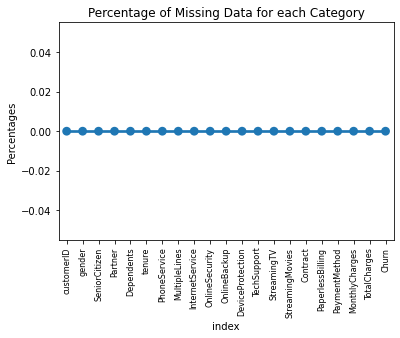

In [16]:
axis = sns.pointplot(x='index',y= 0,data= missing_values)
plt.xticks(rotation=90,fontsize=8)
plt.title('Percentage of Missing Data for each Category')
plt.ylabel("Percentages")
plt.show()

# Data Cleaning

In [17]:
# data manupulation & processing, Total charges should be numeric account so I should convert it to numeric values(TotalCharges)

In [18]:
df = df.copy()

In [19]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,'coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
# checking the misiing values
df.loc[df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
# (11/7043)*100 only 0.15% of values of missing so we can ignore this values

In [22]:
df.dropna(how='any',inplace=True)  # drop missing values

In [23]:
df['tenure'].max()

72

In [24]:
# Grouping the tenure with bin size of 12 months
groups = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
df['tenure_group'] =  pd.cut(df.tenure,range(1,80,12),right=False,labels = groups)
df['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [25]:
# drop columns not needed for processing such as Customer ID and Tenure
df.drop(columns= ['customerID','tenure'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

In [26]:
for i,predictor in enumerate(df):
    print(i,predictor)

0 gender
1 SeniorCitizen
2 Partner
3 Dependents
4 PhoneService
5 MultipleLines
6 InternetService
7 OnlineSecurity
8 OnlineBackup
9 DeviceProtection
10 TechSupport
11 StreamingTV
12 StreamingMovies
13 Contract
14 PaperlessBilling
15 PaymentMethod
16 MonthlyCharges
17 TotalCharges
18 Churn
19 tenure_group


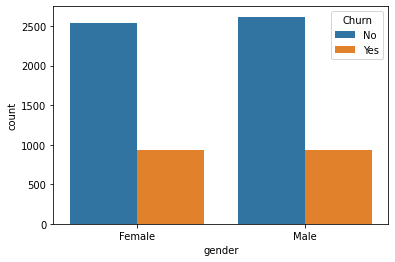

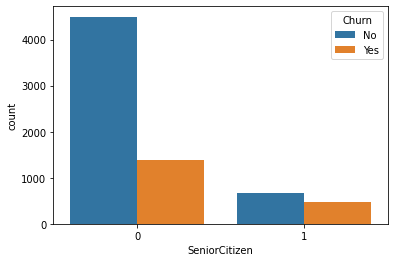

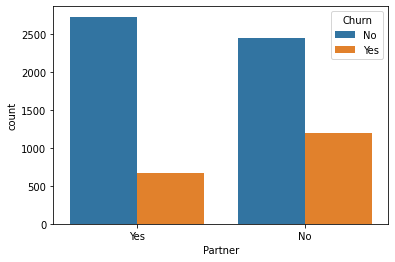

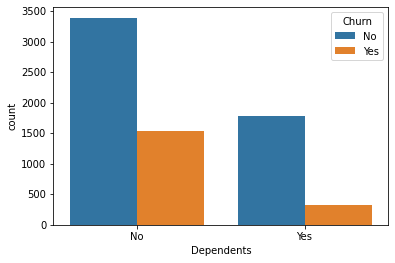

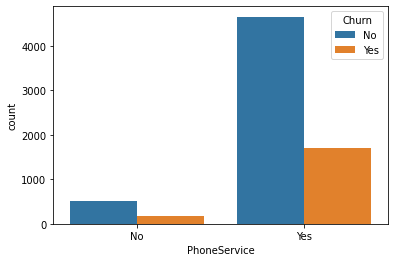

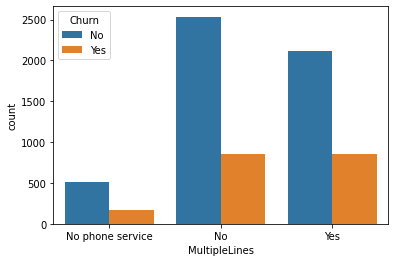

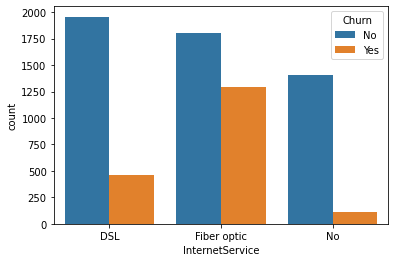

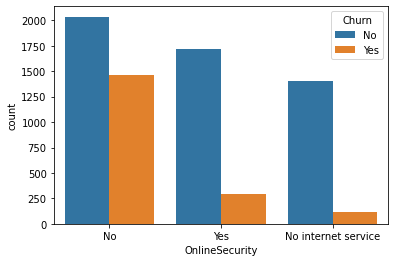

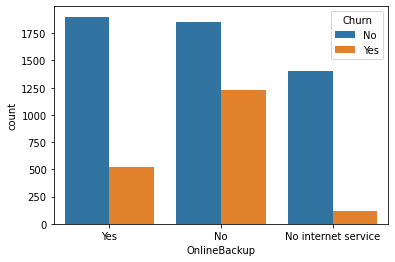

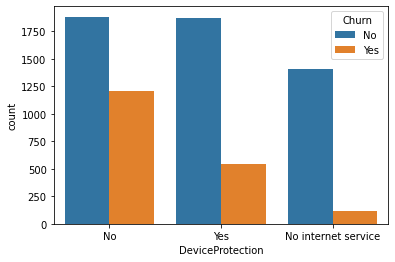

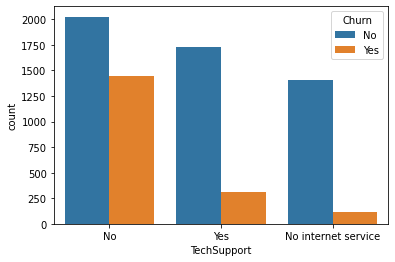

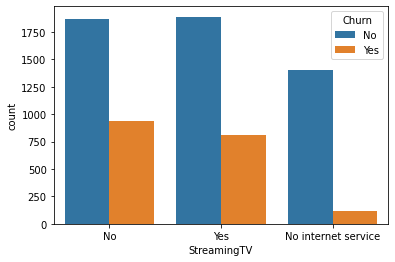

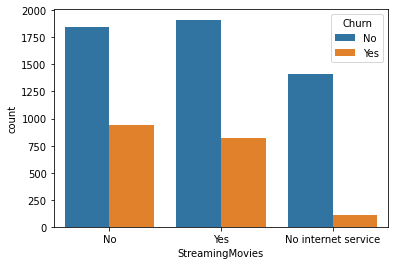

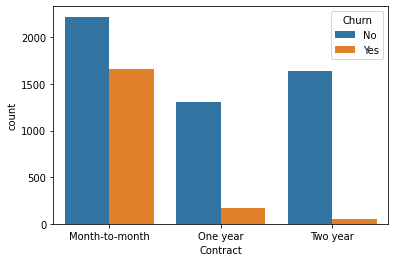

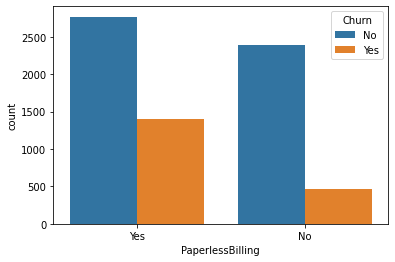

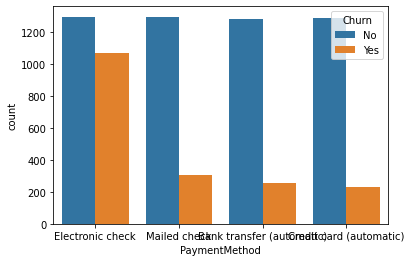

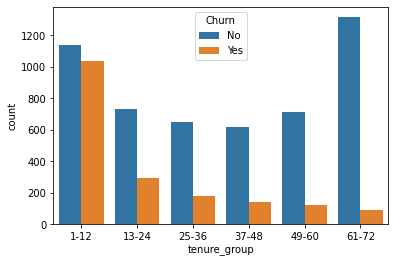

In [27]:
for i,predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df , x= predictor , hue='Churn')

In [28]:
# convering the target variable 'Churn' in binary numeric format
#i.e. Yes="1", No = "0"

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [30]:
df['Churn'] = np.where(df.Churn=='Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [31]:
df_dummies = pd.get_dummies(df)
df_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


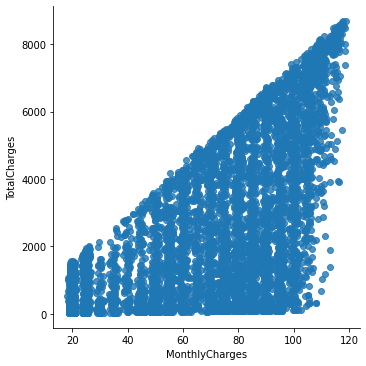

In [32]:
# Finding the relationship between Monthly and Total Yearly Charges
sns.lmplot(data = df_dummies,x ='MonthlyCharges',y = 'TotalCharges', fit_reg = False)

Text(0.5, 1.0, 'Monthly Charges by Churn')

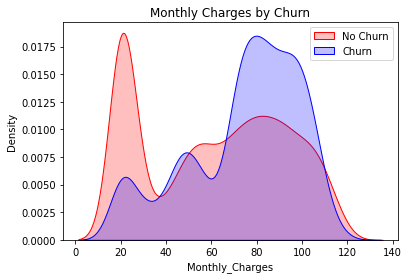

In [33]:
KDE_plot = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"]==0)],color="Red",shade=True)
KDE_plot = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"]==1)],ax= KDE_plot,color="Blue",shade=True)
KDE_plot.legend(["No Churn","Churn"],loc='upper right')
KDE_plot.set_ylabel('Density')
KDE_plot.set_xlabel('Monthly_Charges')
KDE_plot.set_title('Monthly Charges by Churn')

In [34]:
# Churn is high when monthly charges are high

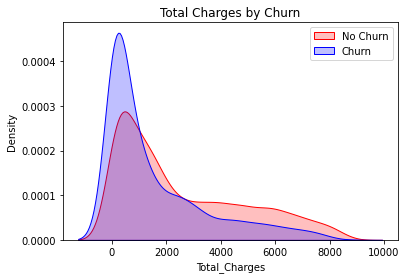

In [35]:
KDE_plot_1 = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"]==0)],color="Red",shade=True)
KDE_plot_1 = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"]==1)],ax= KDE_plot_1,color="Blue",shade=True)
KDE_plot_1.legend(["No Churn","Churn"],loc='upper right')
KDE_plot_1.set_ylabel('Density')
KDE_plot_1.set_xlabel('Total_Charges')
KDE_plot_1.set_title('Total Charges by Churn')
plt.show()

<AxesSubplot:>

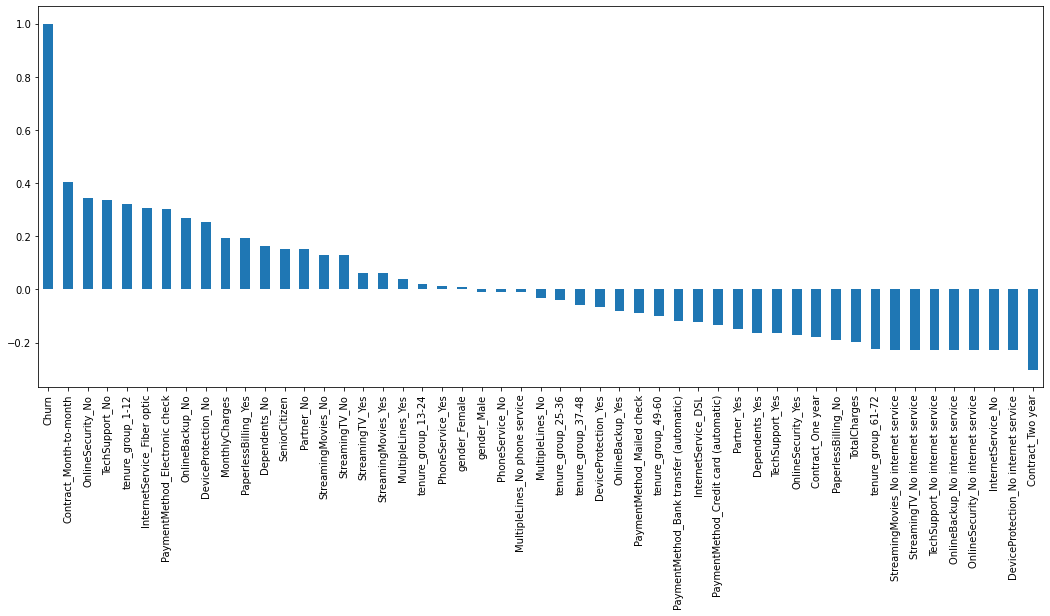

In [45]:
plt.figure(figsize=(18,7))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

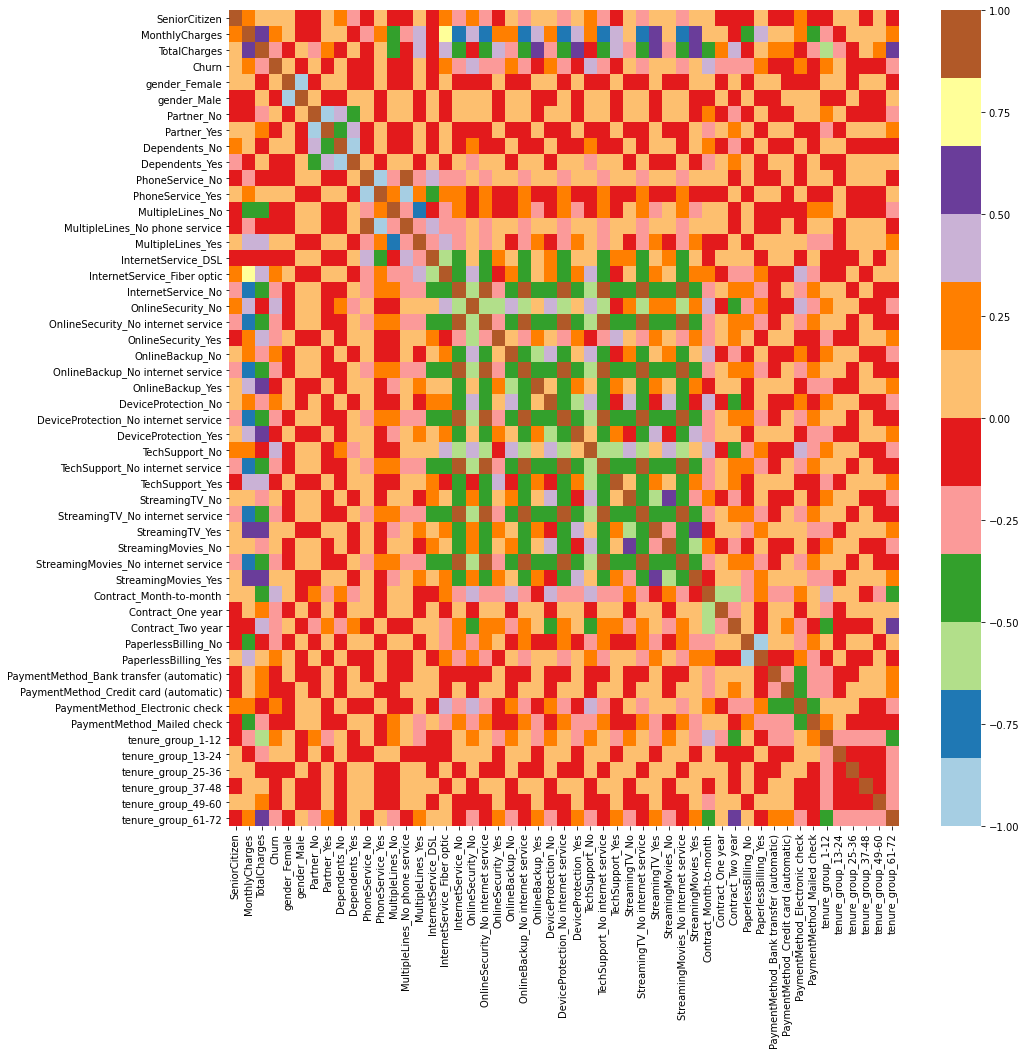

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(df_dummies.corr(),cmap="Paired")

# Bivariate Analysis

In [65]:
df_no_churn = df.loc[df["Churn"]==0]
df_churn = df.loc[df["Churn"]==1]

In [68]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams["axes.titlesize"] = 20
    plt.rcParams["axes.titlepad"]  = 25
    
    take = pd.Series(data=hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique())+7+4*len(take.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

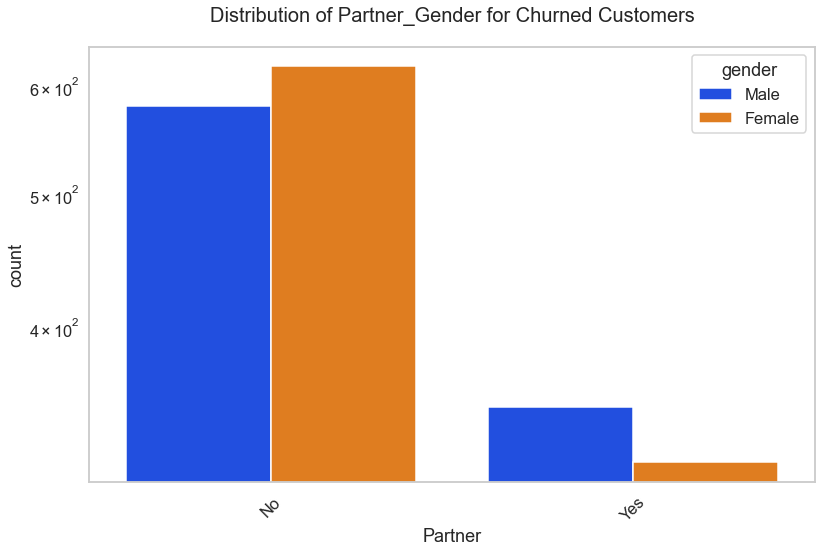

In [83]:
uniplot(df_churn,col='Partner',title='Distribution of Partner_Gender for Churned Customers',hue='gender')

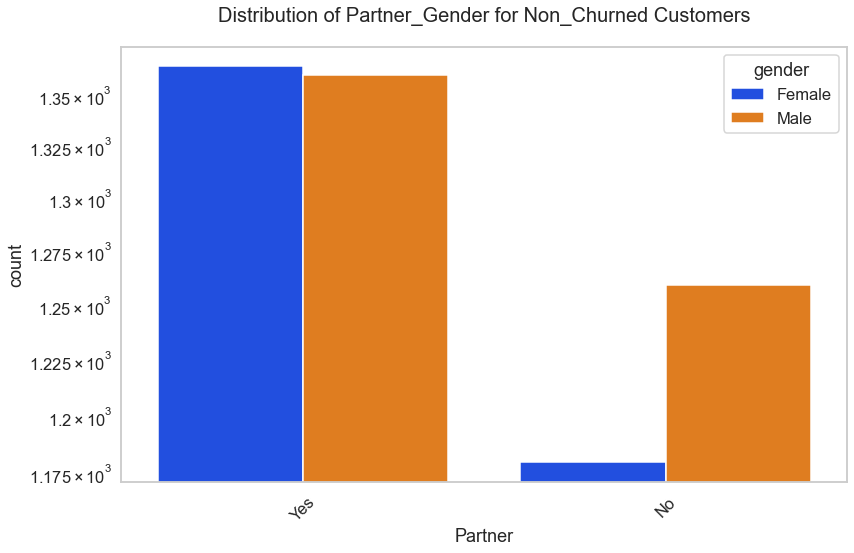

In [84]:
uniplot(df_no_churn,col='Partner',title='Distribution of Partner_Gender for Non_Churned Customers',hue='gender')

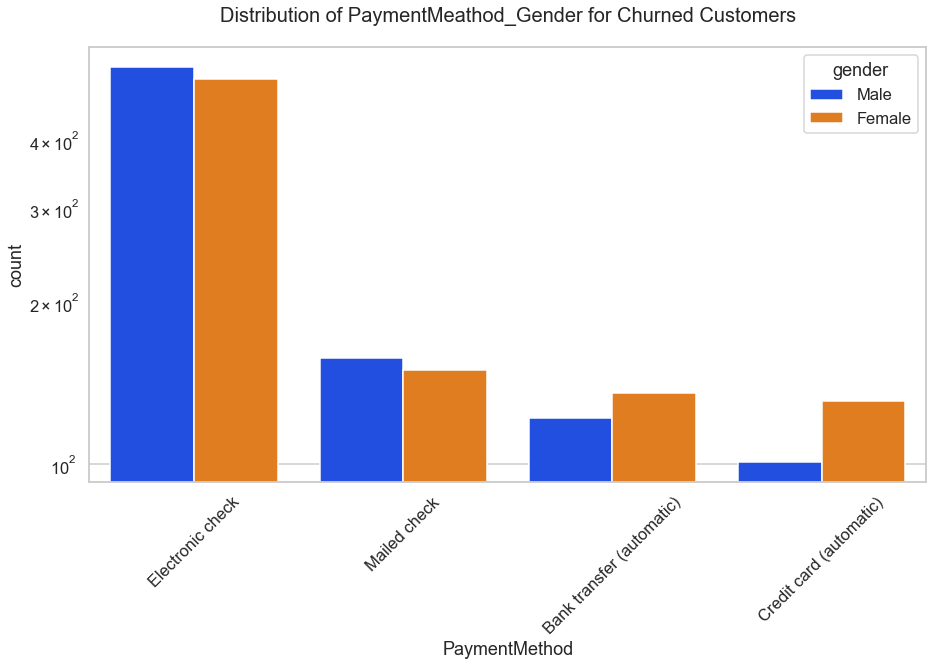

In [85]:
uniplot(df_churn,col='PaymentMethod',title='Distribution of PaymentMeathod_Gender for Churned Customers',hue='gender')

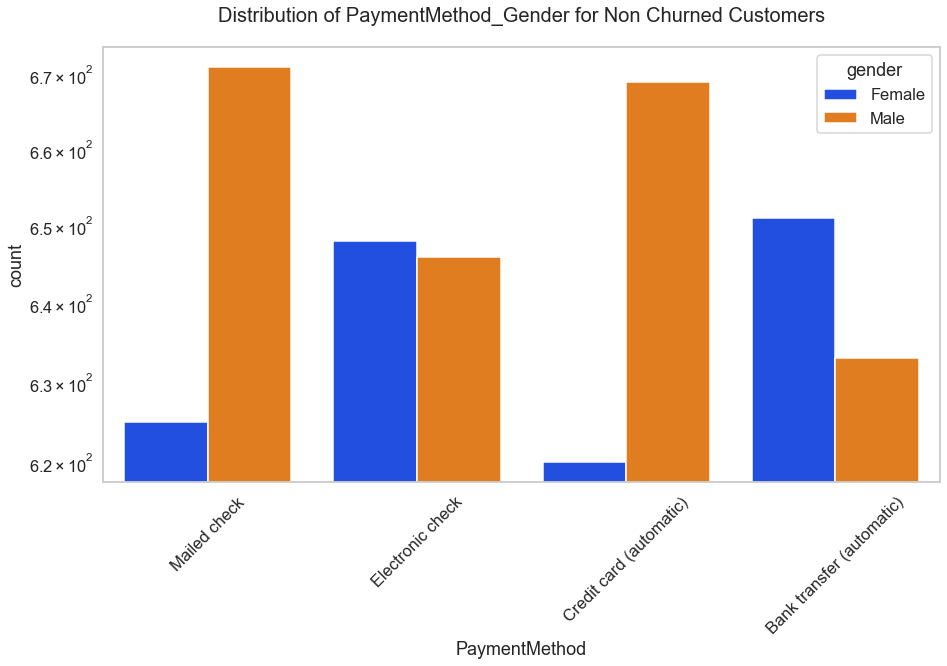

In [86]:
uniplot(df_no_churn,col='PaymentMethod',title='Distribution of PaymentMethod_Gender for Non Churned Customers',hue='gender')

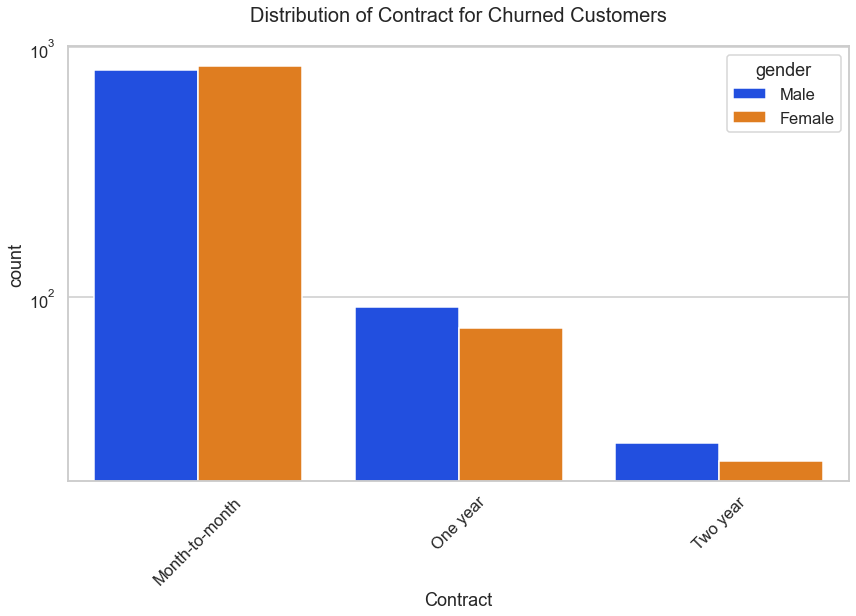

In [75]:
uniplot(df_churn,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

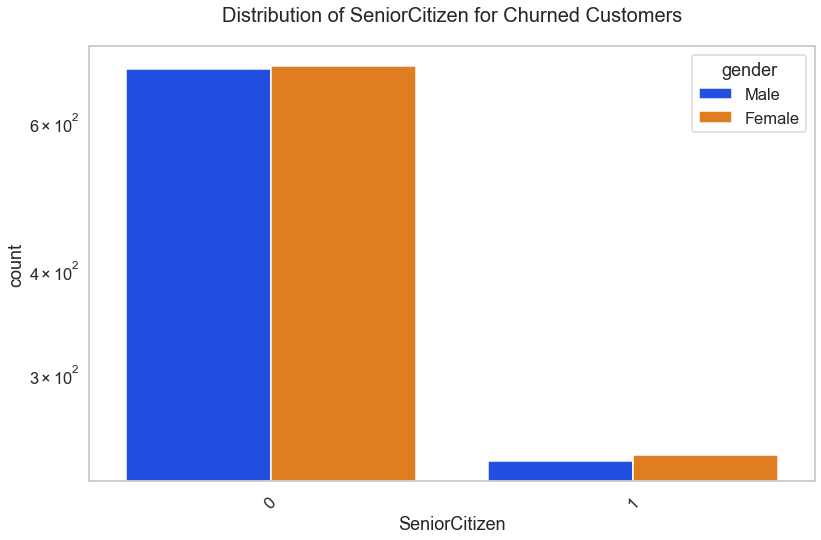

In [88]:
uniplot(df_churn,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

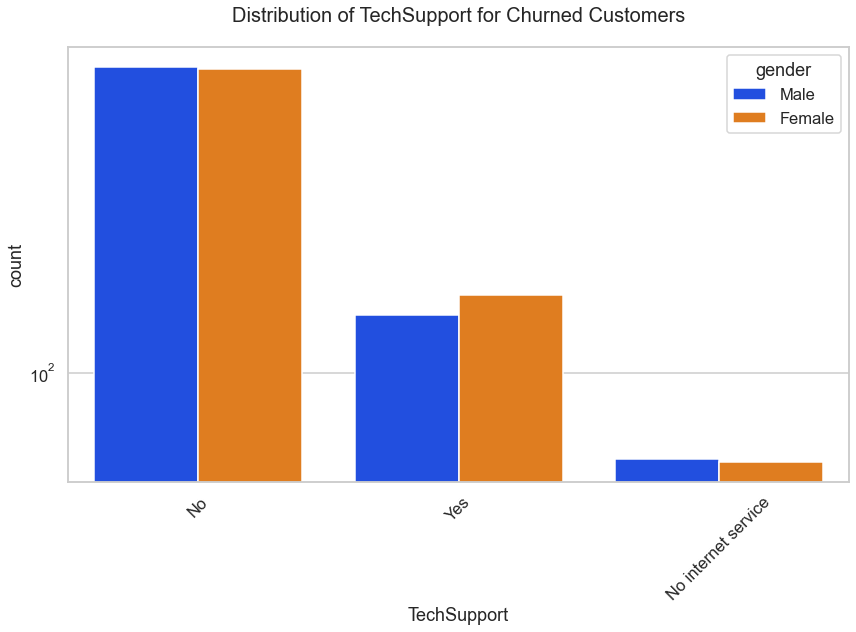

In [89]:
uniplot(df_churn,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

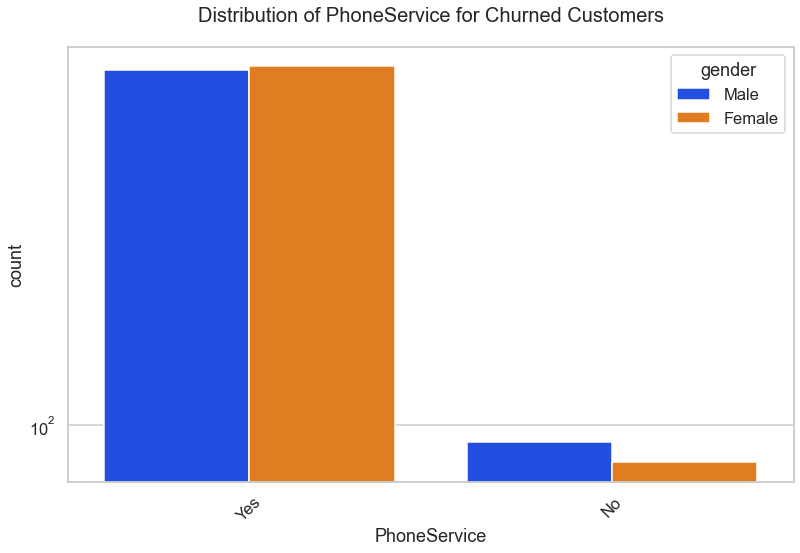

In [90]:
uniplot(df_churn,col='PhoneService',title='Distribution of PhoneService for Churned Customers',hue='gender')

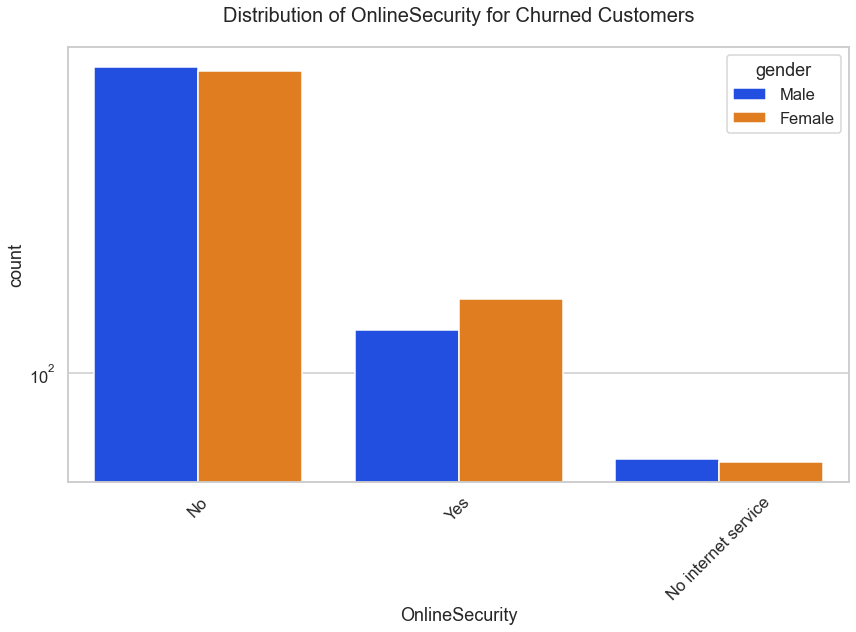

In [91]:
uniplot(df_churn,col='OnlineSecurity',title='Distribution of OnlineSecurity for Churned Customers',hue='gender')

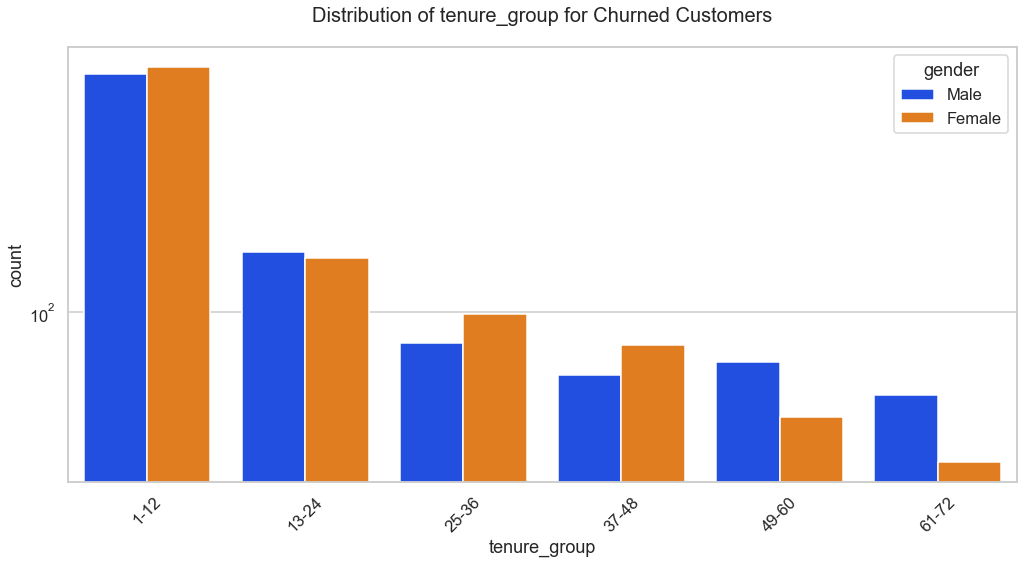

In [93]:
uniplot(df_churn,col='tenure_group',title='Distribution of tenure_group for Churned Customers',hue='gender')

In [57]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

# Insights:

In [59]:
len(pd.Series(data='gender').unique())

1

In [60]:
df['Partner'].value_counts()#.index

No     3639
Yes    3393
Name: Partner, dtype: int64

In [61]:
df['Partner'].value_counts().index

Index(['No', 'Yes'], dtype='object')